# **Exploratory data analysis**

In [1]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the clean data
games = pd.read_csv('data/games.csv')
genres = pd.read_csv('data/genres.csv')
specs = pd.read_csv('data/specs.csv')
tags = pd.read_csv('data/tags.csv')
playtimePerGame = pd.read_csv('data/playtimePerGame.csv')
sentiment = pd.read_csv('data/sentiment_analysis.csv')

## Plotting the price of the games by release year. We realize the price of the most games ranges from 0\$ to 10\$. We can see some values out of the range of the boxplot, but they weren't deleted because weren't considered outliers.

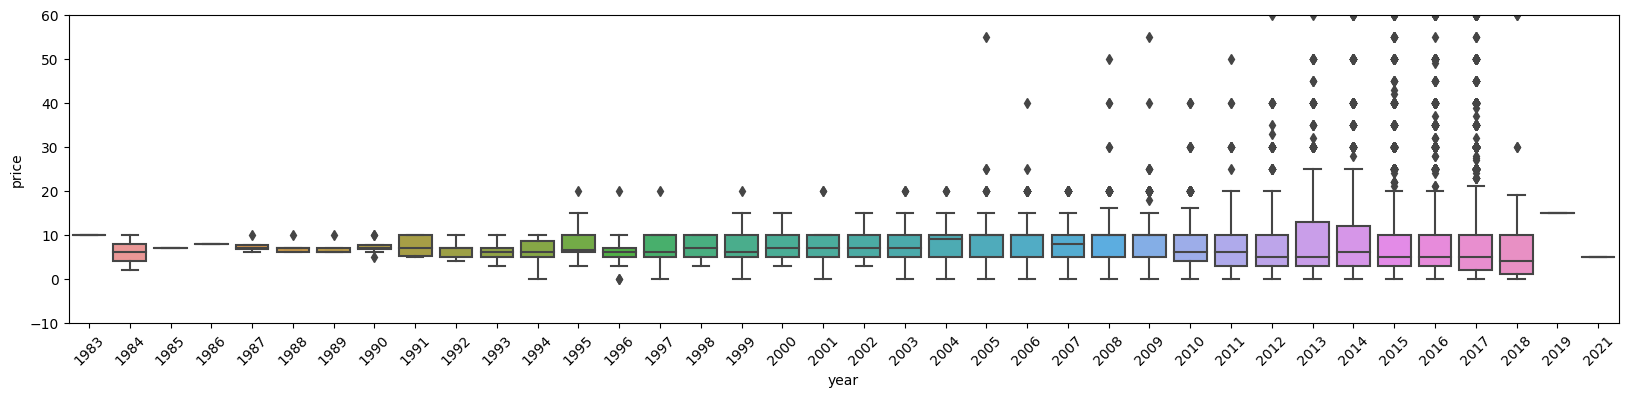

In [3]:
plt.figure(figsize=(20,4), dpi=100)
sns.boxplot(y=games['price'], x=games['year'])
plt.xticks(rotation=45)
plt.ylim(-10, 60)
plt.show()

## We want to know the distribution of the genres in the dataset *games*, the most games are of the genre **indie**

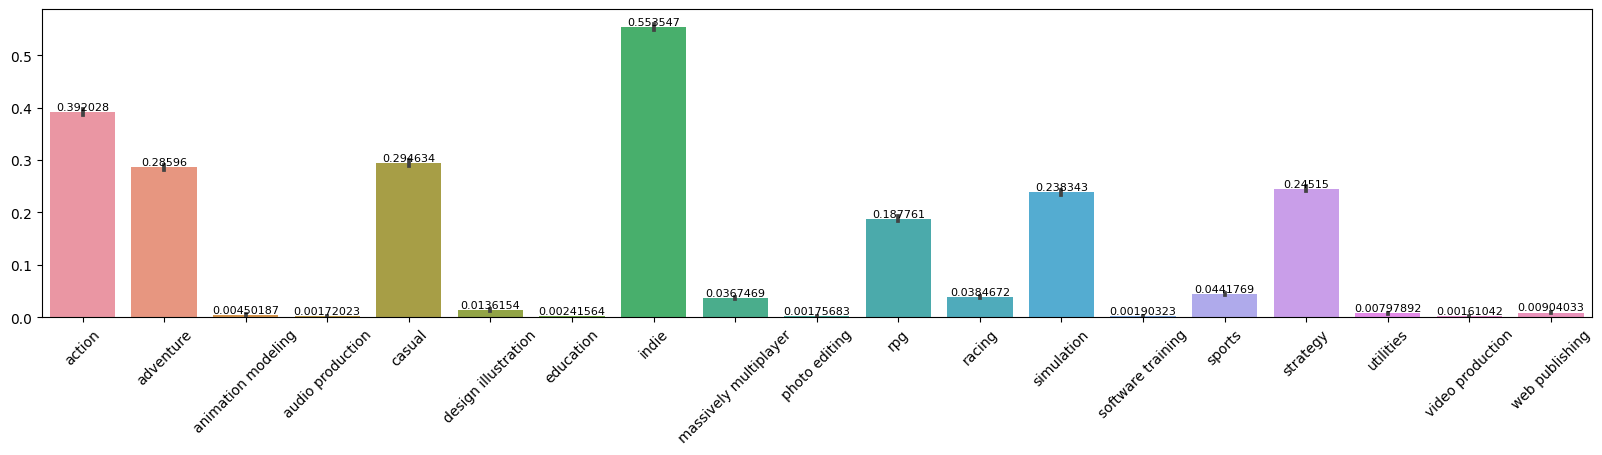

In [4]:
plt.figure(figsize=(20,4), dpi=100)
ax = sns.barplot(
    data=genres.drop(columns=['id_game'])
)
ax.bar_label(ax.containers[0], fontsize=8)
plt.xticks(rotation=45)
plt.show()

## In the following three block of code, we have computed the correlation between the features of **genres**, **tags** and **specs** with the price of the game. We find a low correlation in this features with the price. But some features of **genres**, **tags** and **specs** have a considerable correlation between them.

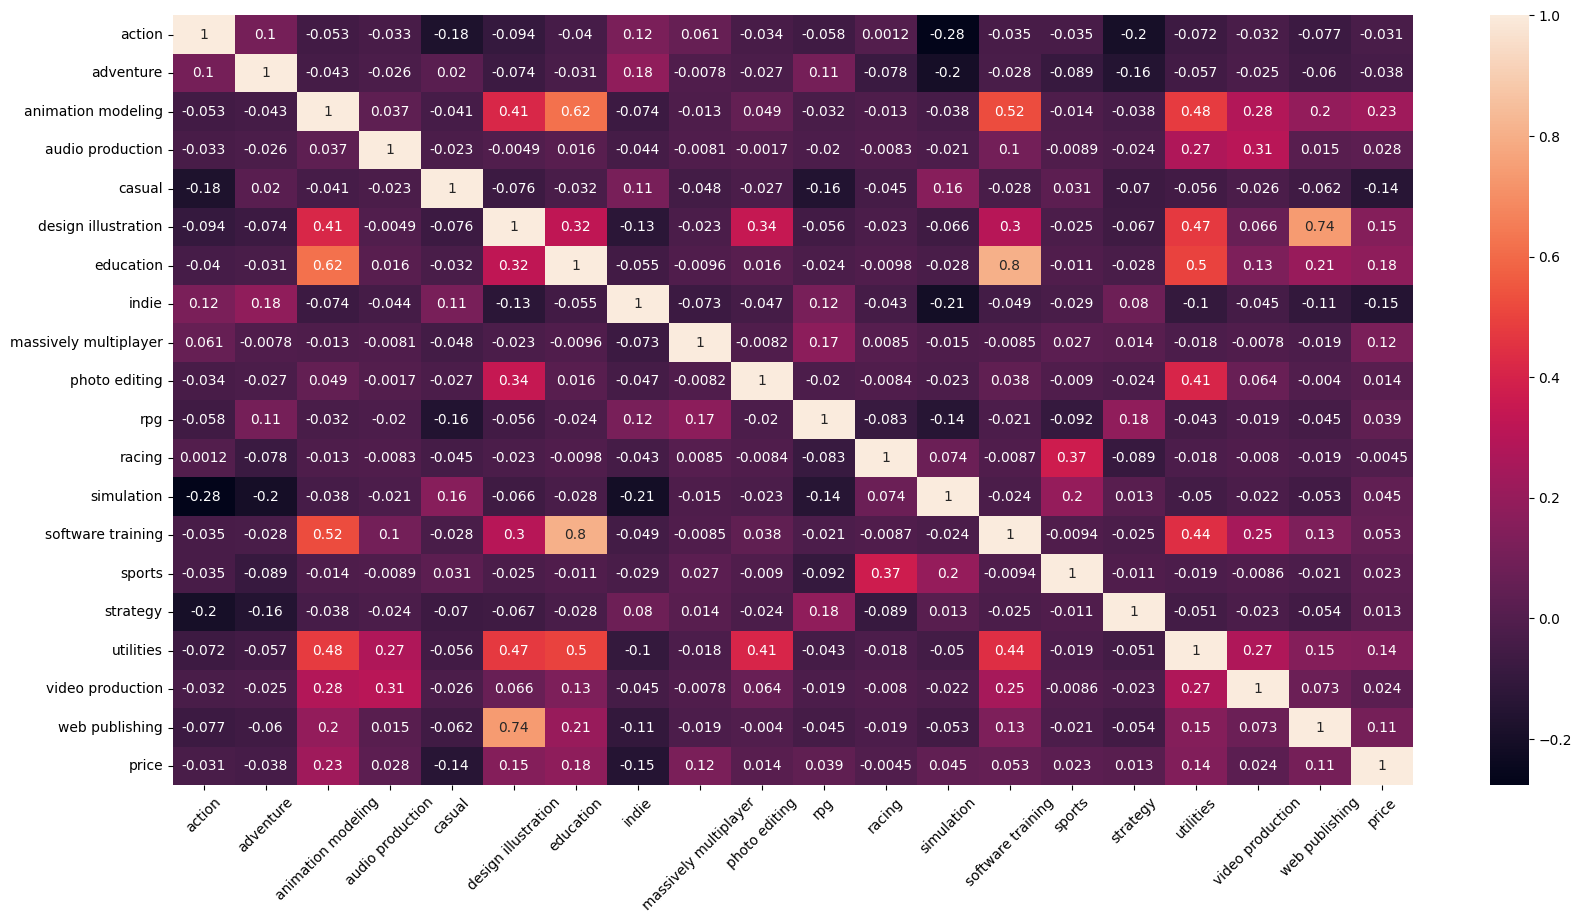

In [5]:
genresToHM = pd.concat(
    [genres, games['price']],
    axis=1
)

plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(
    genresToHM.drop(columns=['id_game']).corr(),
    annot=True
)
plt.xticks(rotation=45)
plt.show()

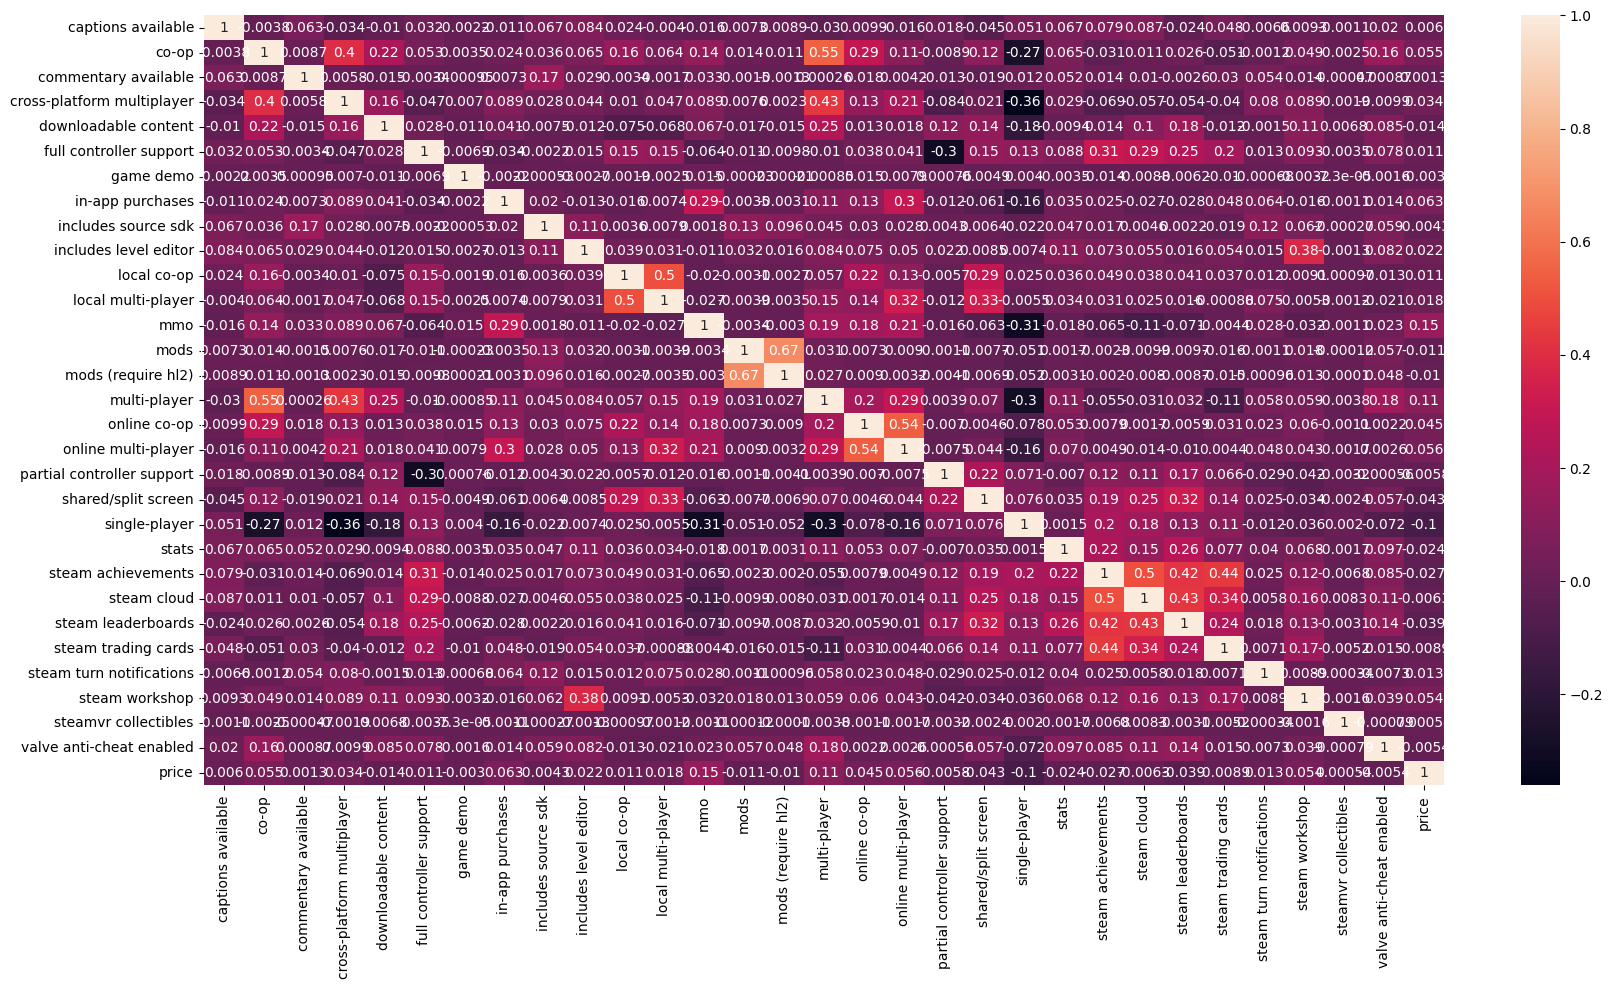

In [6]:
specsToHM = pd.concat(
    [specs, games['price']],
    axis=1
)

plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(
    specsToHM.drop(columns=['id_game']).corr(),
    annot=True
)
plt.xticks(rotation='vertical')
plt.show()

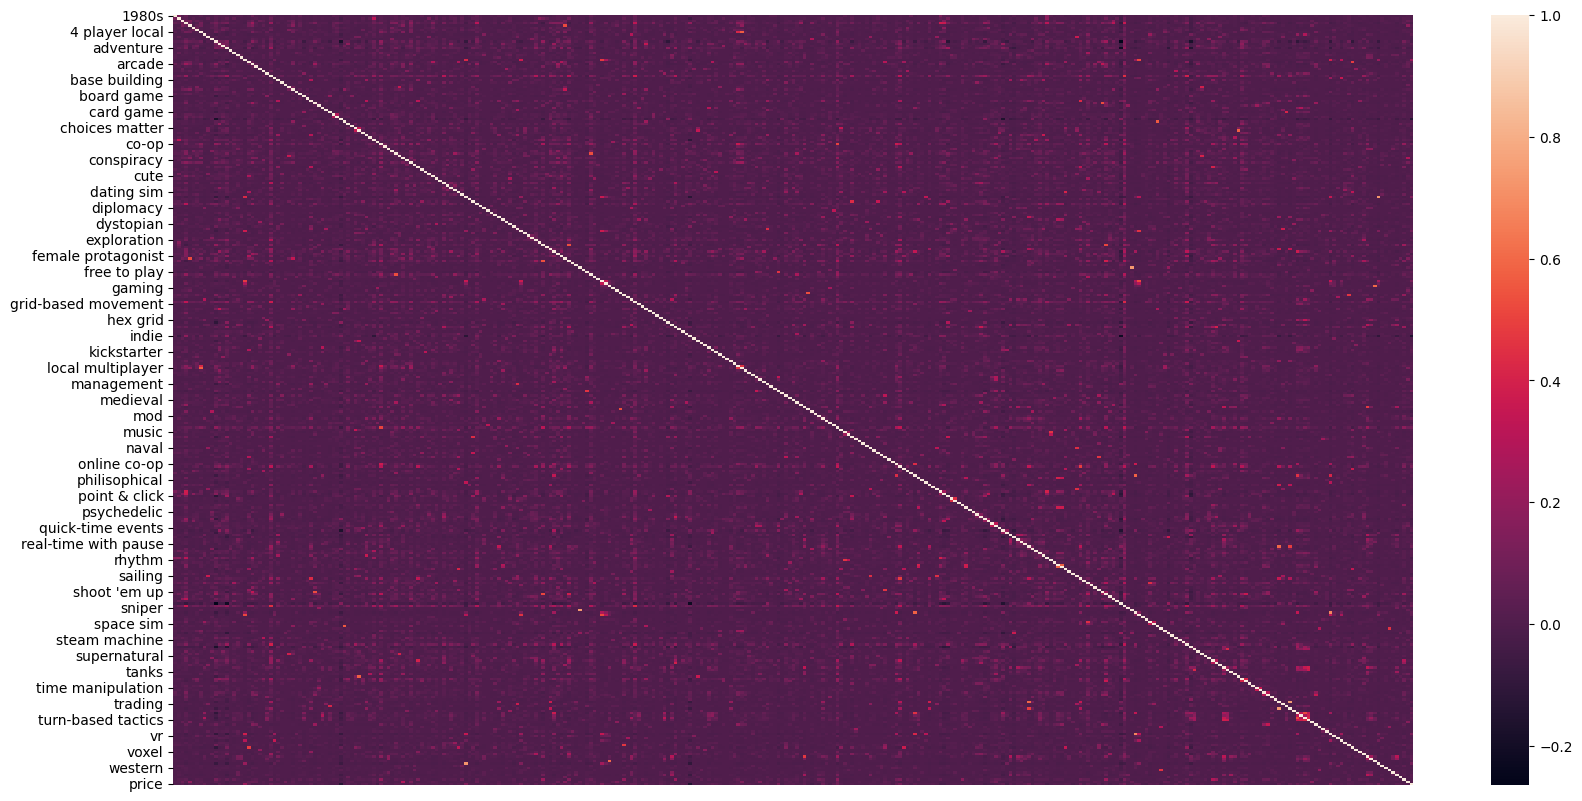

In [7]:
tagsToHM = pd.concat(
    [tags, games['price']],
    axis=1
)

plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(
    tagsToHM.drop(columns=['id_game']).corr(),
    annot=False,
    xticklabels=False
)
plt.show()

## We show the most popular games in the platform Steam

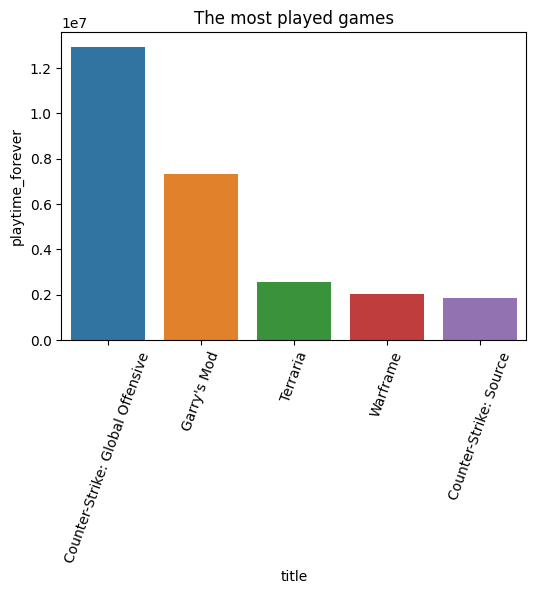

In [9]:
try:
  playtimePerGame_ = playtimePerGame.merge(games[['id_game', 'title']], on='id_game')
  playtimePerGame_.drop(columns=['id_game'], inplace=True)
  playtimePerGame_.reset_index(drop=True, inplace=True)
except Exception as e:
  print(e)
  pass

plt.figure(figsize=(6,4), dpi=100)
sns.barplot(
    playtimePerGame_.nlargest(5, columns='playtime_forever'),
    x='title',
    y='playtime_forever'
)
plt.xticks(rotation=70)
plt.title('The most played games')
plt.show()

## We want to know the first five by count of sentiment. Since Team Fortress II and Counter-Strike: Global Offensive are the most reviewed games, they have as much positive reviews as negative.

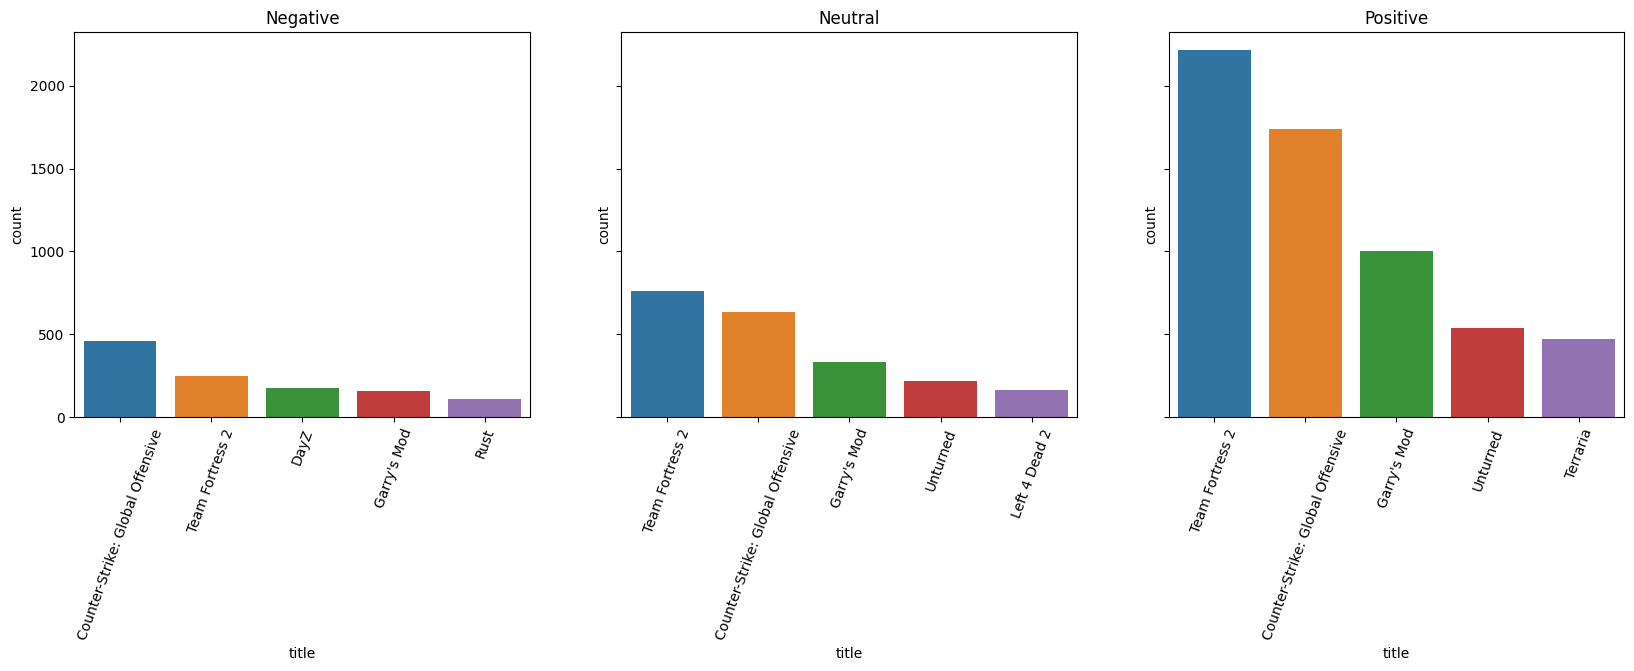

In [12]:
plots = []
title_sentiment = ['Negative', 'Neutral', 'Positive']
for i in range(0, 3):
  sentimentP = sentiment.groupby(
      by=['id_game', 'sentiment'], as_index=False
  ).agg(count=('sentiment', 'count'))
  sentimentP = sentimentP.merge(games[['id_game', 'title']], on='id_game')
  sentimentP = sentimentP[sentimentP['sentiment']==i].sort_values(by='count', ascending=False)
  sentimentP.drop(columns=['id_game', 'sentiment'], inplace=True)
  sentimentP.reset_index(drop=True, inplace=True)
  plots.append(sentimentP)

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for ax, df, title_  in zip(axes, plots, title_sentiment):
  sns.barplot(
      ax=ax,
      data=df.nlargest(5, columns='count'),
      x='title',
      y='count',
  )
  ax.set_title(title_)
  ax.tick_params(axis='x', rotation=70)

## The distribution of sentiment we can get it by using a pie chart, where the most of the reviews are positive.

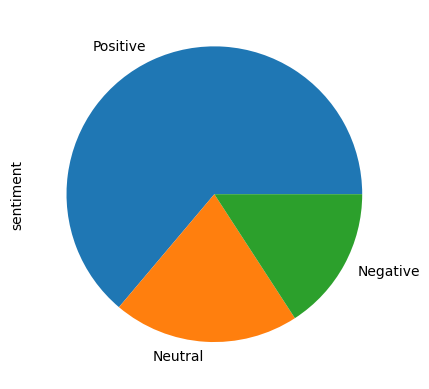

In [13]:
def sentiment_name(value):
  if value==0:
    return 'Negative'
  elif value==1:
    return 'Neutral'
  elif value==2:
    return 'Positive'
toPieChart = sentiment['sentiment'].apply(sentiment_name)
toPieChart.value_counts().plot(kind='pie')
plt.show()

## We want to know if existe a good correlaton between the genres and the sentimen, but we find a low correlation between both features.

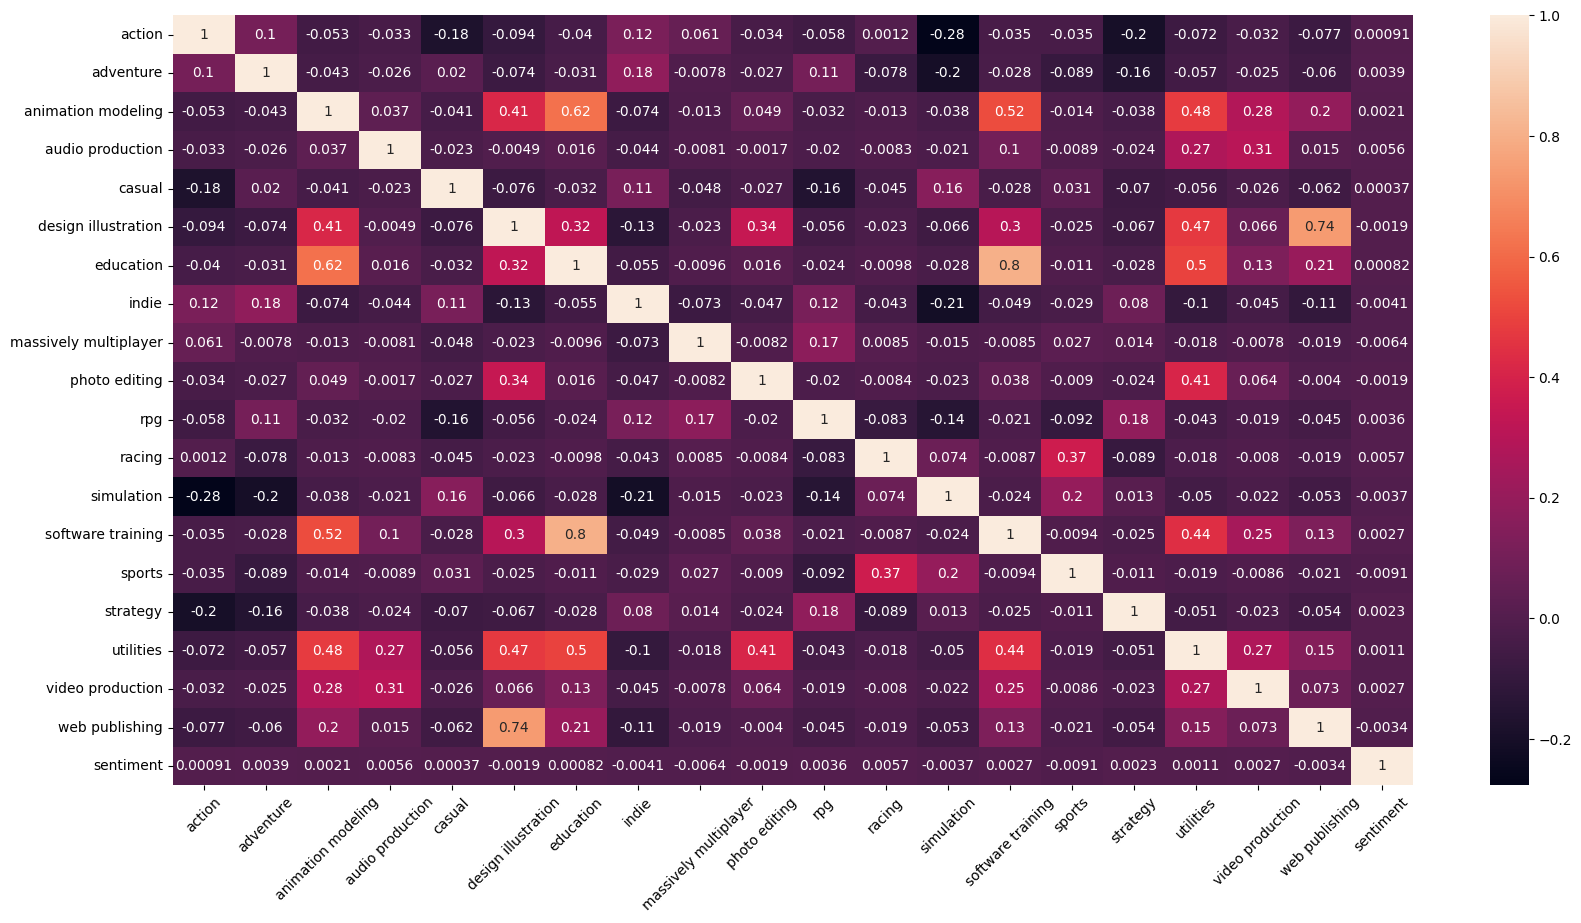

In [17]:
genres_sentiment_corr = pd.concat(
    [genres, sentiment['sentiment']],
    axis=1
)

plt.figure(figsize=(20,10), dpi=100)
sns.heatmap(
    genres_sentiment_corr.drop(columns=['id_game']).corr(),
    annot=True
)
plt.xticks(rotation=45)
plt.show()